# IMPORT LIBRARIES


In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df_alexa=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [84]:
df_alexa.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [85]:
df_alexa.tail(5)

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [86]:
df_alexa.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [87]:
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
5       I received the echo as a gift. I needed anothe...
6       Without having a cellphone, I cannot use many ...
7       I think this is the 5th one I've purchased. I'...
8                                             looks great
9       Love it! I’ve listened to songs I haven’t hear...
10      I sent it to my 85 year old Dad, and he talks ...
11      I love it! Learning knew things with it eveyda...
12      I purchased this for my mother who is having k...
13                                     Love, Love, Love!!
14                               Just what I expected....
15                              I love it, wife hates it.
16      Really happy with this purchase.  Great speake...
17      We hav

# VISUALISE DATA

In [88]:
positive = df_alexa[df_alexa['feedback']==1]


In [89]:
negative = df_alexa[df_alexa['feedback']==0]


In [90]:
positive.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [91]:
negative.tail(5)

,rating,date,variation,verified_reviews,feedback
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0
3096,1,30-Jul-18,White Dot,The product sounded the same as the emoji spea...,0


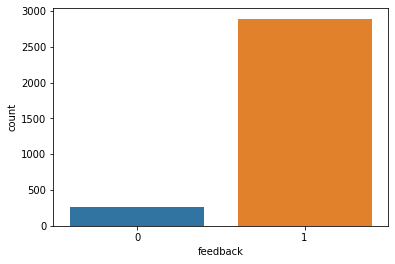

In [92]:
sns.countplot(df_alexa['feedback'],label='count')

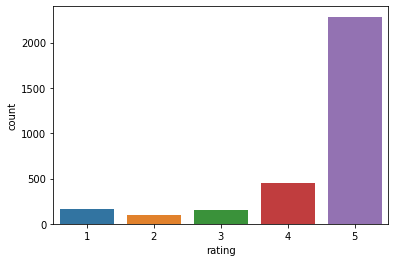

In [93]:
sns.countplot(df_alexa['rating'],label='count')

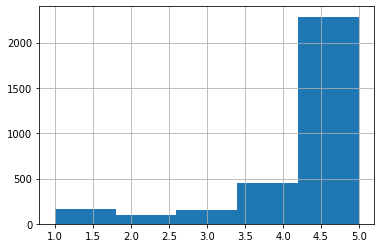

In [94]:
df_alexa['rating'].hist(bins=5)

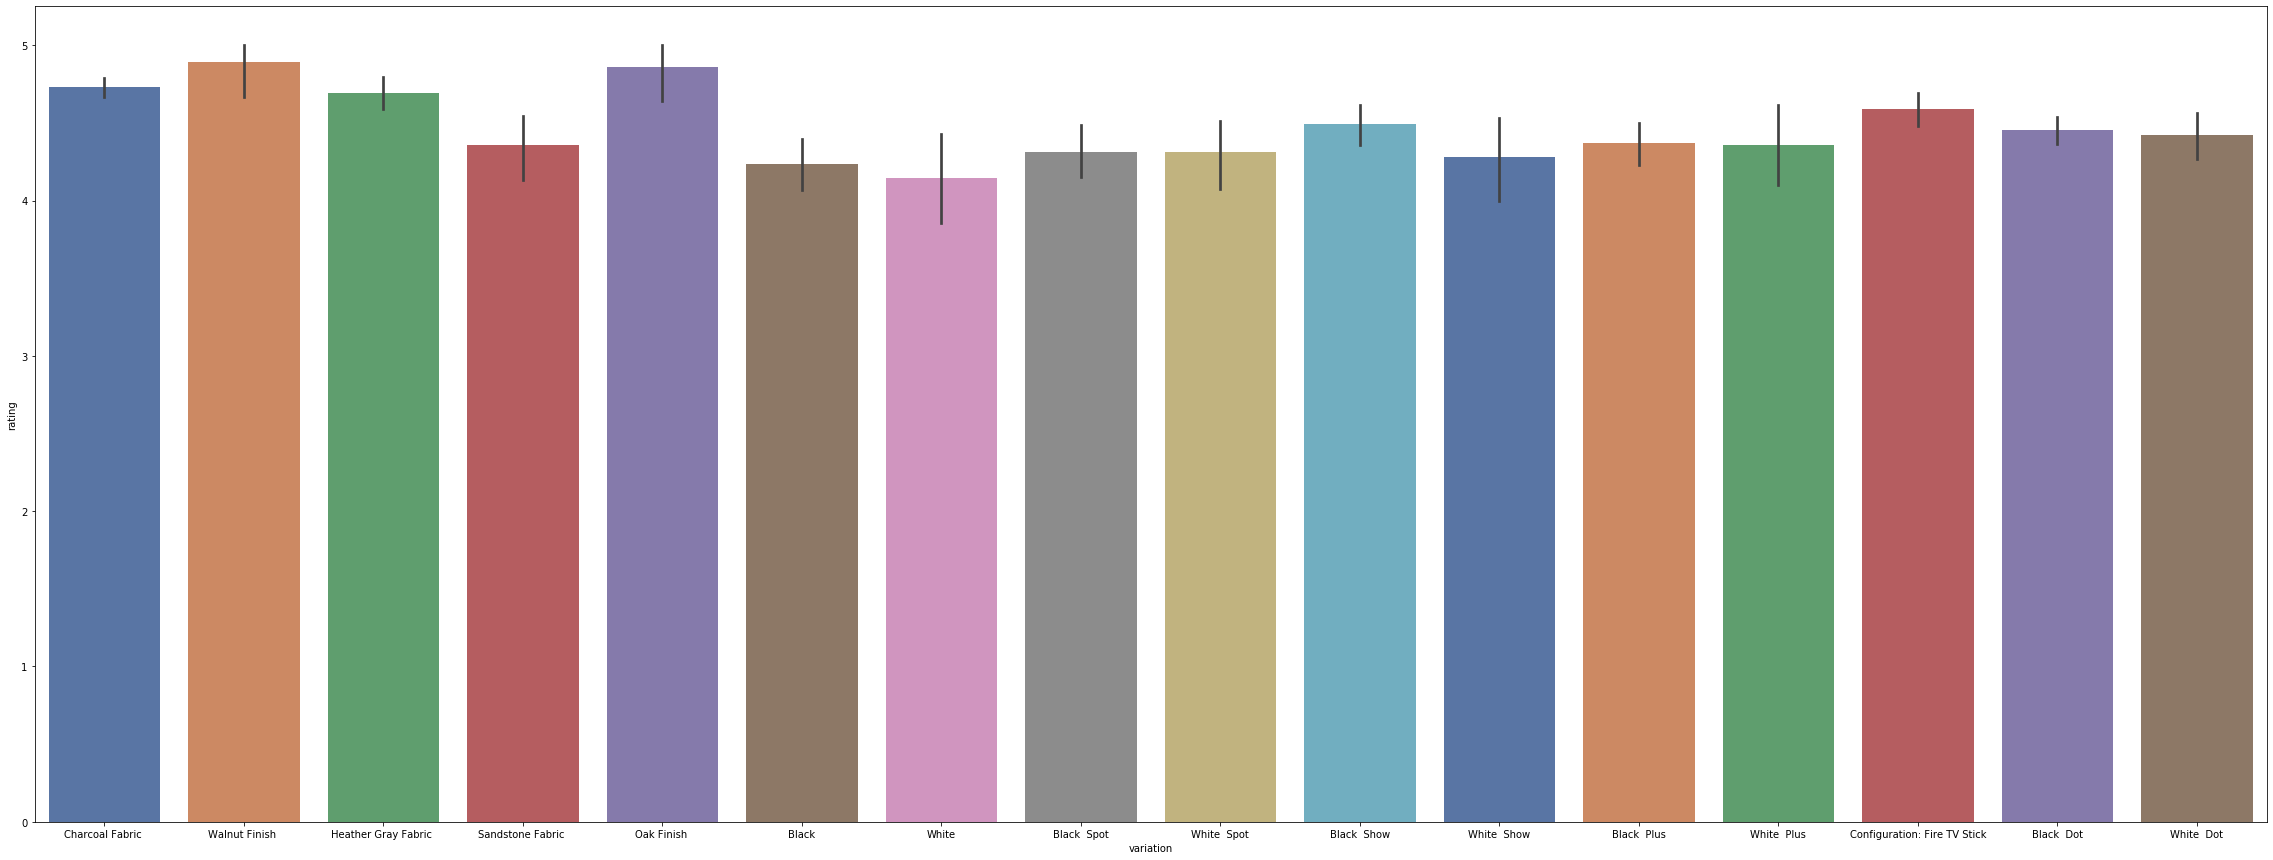

In [95]:
plt.figure(figsize=(40,15))
sns.barplot(x='variation',y='rating',data=df_alexa,palette='deep')


# CLEAN DATA

In [96]:
df_alexa=df_alexa.drop(['date','rating'],axis=1)

In [97]:
df_alexa.tail(5)

,variation,verified_reviews,feedback
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1
3149,Black Dot,Good,1


In [98]:
variation_dummies=pd.get_dummies(df_alexa['variation'],drop_first='True')

In [99]:
variation_dummies.head(5)

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
df_alexa.drop(['variation'],axis=1,inplace=True)

df_alexa.head(5)


,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [102]:
df_alexa=pd.concat([df_alexa,variation_dummies],axis=1)
df_alexa.head(5)


,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
alexa_countvectorizer= vectorizer.fit_transform(df_alexa['verified_reviews'])

In [107]:
type(alexa_countvectorizer)

scipy.sparse.csr.csr_matrix

In [109]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [110]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [111]:
df_alexa.drop(['verified_reviews'],axis=1,inplace=True)

In [113]:
reviews=pd.DataFrame(alexa_countvectorizer.toarray())

In [117]:
df_alexa=pd.concat([df_alexa,reviews],axis=1)
df_alexa.head(5)

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X=df_alexa.drop(['feedback'],axis=1)

In [122]:
y= df_alexa['feedback']

# MODEL TRAINING

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=5)

In [144]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
randomforestclassifier=RandomForestClassifier(n_estimators=100,criterion='entropy')
randomforestclassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# EVALUATE

In [145]:
y_predict_train=randomforestclassifier.predict(X_train)
cm = confusion_matrix(y_train,y_predict_train)


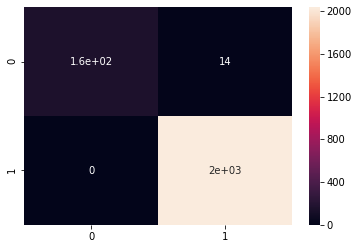

In [146]:
sns.heatmap(cm,annot=True)

In [147]:
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       171
           1       0.99      1.00      1.00      2034

    accuracy                           0.99      2205
   macro avg       1.00      0.96      0.98      2205
weighted avg       0.99      0.99      0.99      2205



In [148]:
y_predict=randomforestclassifier.predict(X_test)
cm=confusion_matrix(y_test,y_predict)

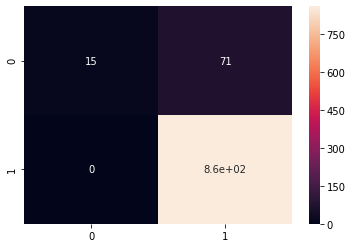

In [149]:
sns.heatmap(cm,annot=True)

In [150]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.17      0.30        86
           1       0.92      1.00      0.96       859

    accuracy                           0.92       945
   macro avg       0.96      0.59      0.63       945
weighted avg       0.93      0.92      0.90       945



# IMPROVE


In [135]:
# Let's drop the variations and add review length as a feature
df_alexa = pd.read_csv('amazon_alexa.tsv', sep='\t')


In [136]:
df_alexa = pd.concat([df_alexa, pd.DataFrame(alexa_countvectorizer.toarray())], axis = 1)

In [137]:
df_alexa['length'] = df_alexa['verified_reviews'].apply(len)


In [138]:
X = df_alexa.drop(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], axis = 1)

In [139]:
y = df_alexa['feedback']

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

              precision    recall  f1-score   support

           0       0.89      0.16      0.27        51
           1       0.93      1.00      0.96       579

    accuracy                           0.93       630
   macro avg       0.91      0.58      0.61       630
weighted avg       0.93      0.93      0.91       630



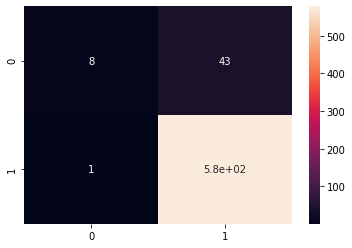

In [141]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
randomforest_classifier.fit(X_train, y_train)
y_predict = randomforest_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))